In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy.linalg

def inverse_sqrt(M):
    return scipy.linalg.sqrtm(scipy.linalg.inv(M))

def normalize(L, D):
    D12 = inverse_sqrt(D)
    return np.dot(np.dot(D12, L), D12)

def gen_affinity_matrix(data):
    """
    Returns an affinity matrix from a set of datapoints. Affinity is computed as exp(-dist)
    Input:
    data (ndarray, float): a set of datapoints
    Output:
    affinity (ndarray, float): an affinity matrix for the datapoints
    """ 
    distances = squareform(pdist(data, 'sqeuclidean'))
    
    # First look for a threshold distance that 
    # 1. large enough that so that we can eliminate edges
    # 2. but still maintain connectivity of all the vertices
    # Then, set every distance d above a threshold to infinity so that exp(-d)=0
    
    # Find threshold
    zero = np.where(distances == 0) # Cannot let zero distances interfere with our search
    distances[zero] = np.full(distances.shape, np.NaN)[zero] # set zero to NaN
    threshold = np.nanmax(np.nanmin(distances, axis=0)) # threshold for connectivity
    distances[zero] = np.zeros(distances.shape)[zero] # restore zero
    
    # Compute affinity matrix
    set2inf = np.where(distances > threshold)
    affinity = np.exp(-distances)
    affinity[set2inf] = np.zeros(distances.shape)[set2inf]
    return affinity

(100, 98)


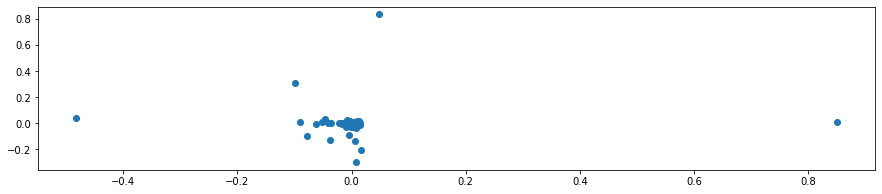

In [7]:
import matplotlib.pyplot as plt

data = np.random.random((100, 50))

W = gen_affinity_matrix(data)

degree = W.sum(axis=0)
D = np.zeros(W.shape)
row, col = np.diag_indices(D.shape[0]) 
D[row, col] = degree
L = D - W
nL = normalize(L, D)

eigenvalues, eigenvectors = np.linalg.eig(nL)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
embedding = eigenvectors[:,:-2]

print(embedding.shape)

# Show the largest two eigenvectors
plt.figure(figsize=(15, 3))
plt.scatter(embedding[:,0], embedding[:,1])
plt.show()